Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
movie = movies.iloc[:,5:15]
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


• COLLECTING DATA AND PREPROCESSING
 
 APRIORI ALGORITHM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [8]:
frequent_itemsets_ap = apriori(movie,min_support = 0.15,use_colnames = True,verbose = 1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
frequent_itemsets_ap.sort_values('support',ascending = False).shape

(13, 2)

In [12]:
rules_ap = association_rules(frequent_itemsets_ap,metric = 'confidence',min_threshold = 0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    0.333333  1.666667      0.08         1.2  


In [14]:
rules_ap[(rules_ap.support>0.015) & (rules_ap.confidence>0.4)].sort_values('confidence',ascending = False).shape

(15, 9)

In [15]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x: len(x))
rules_ap[rules_ap['lhs items']>1].sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


In [16]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
#transforming the dataframe into matrix form by using confidence matrix
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values = 'confidence')

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

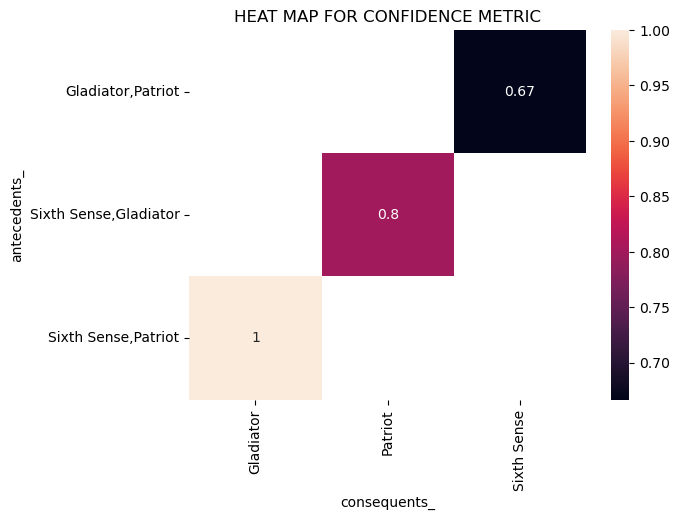

In [17]:
#generating heatmap with annotations
sns.heatmap(pivot,annot = True)
plt.title('HEAT MAP FOR CONFIDENCE METRIC')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [21]:
rules_ap_li = association_rules(frequent_itemsets_ap,metric = 'lift',min_threshold = 0.8)
print(rules_ap_li.shape)

(16, 9)


In [22]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x: len(x))
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

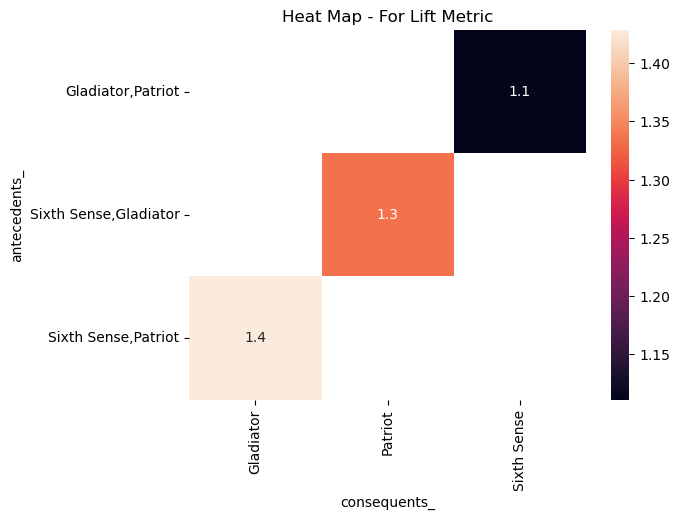

In [23]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

FPGROWTH ALGORITHM

In [24]:
frequent_itemsets_fp = fpgrowth(movie,min_support = 0.1,use_colnames = True,verbose = 1)
print(frequent_itemsets_ap.head())

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [25]:
frequent_itemsets_fp.sort_values('support',ascending = False).shape

(53, 2)

In [26]:
rules_fp = association_rules(frequent_itemsets_fp,metric = 'confidence',min_threshold = 0.8)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  lhs items  \
0      0.5    0.833333  1.190476      0.08         1.8          1   
1      0.5    0.714286  1.190476      0.08         1.4          1   
2      0.4    0.666667  1.111111      0.04         1.2          1   
3      0.4    0.666667  1.111111      0.04         1.2          1   
4      0.2    0.333333  1.666667      0.08         1.2          1   

  antecedents_ consequents_  
0  Sixth Sense    Gladiator  
1    Gladiator  Sixth Sense  
2  Sixth Sense      Patriot  
3      Patriot

In [27]:
rules_fp[(rules_fp.support>0.1) & (rules_fp.confidence>0.4)].sort_values('confidence',ascending = False).shape

(8, 9)

In [28]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x: len(x))
rules_fp[rules_fp['lhs items']>1].sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
48,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
112,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,2
45,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
47,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
93,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2


In [29]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
#transforming the dataframe into matrix form by using confidence matrix
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values = 'confidence')

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Harry Potter1'),
  Text(6.5, 0, 'Harry Potter1,Green Mile,LOTR1'),
  Text(8.5, 0, 'LOTR'),
  Text(10.5, 0, 'LOTR2'),
  Text(12.5, 0, 'LOTR2,Green Mile,LOTR1'),
  Text(14.5, 0, 'LOTR2,Harry Potter1,Green Mile'),
  Text(16.5, 0, 'LOTR2,LOTR1'),
  Text(18.5, 0, 'LOTR2,Sixth Sense,Green Mile'),
  Text(20.5, 0, 'Patriot'),
  Text(22.5, 0, 'Sixth Sense,Gladiator'),
  Text(24.5, 0, 'Sixth Sense,Green Mile,LOTR1'),
  Text(26.5, 0, 'Sixth Sense,Harry Potter1,LOTR1'),
  Text(28.5, 0, 'Sixth Sense,LOTR1')])

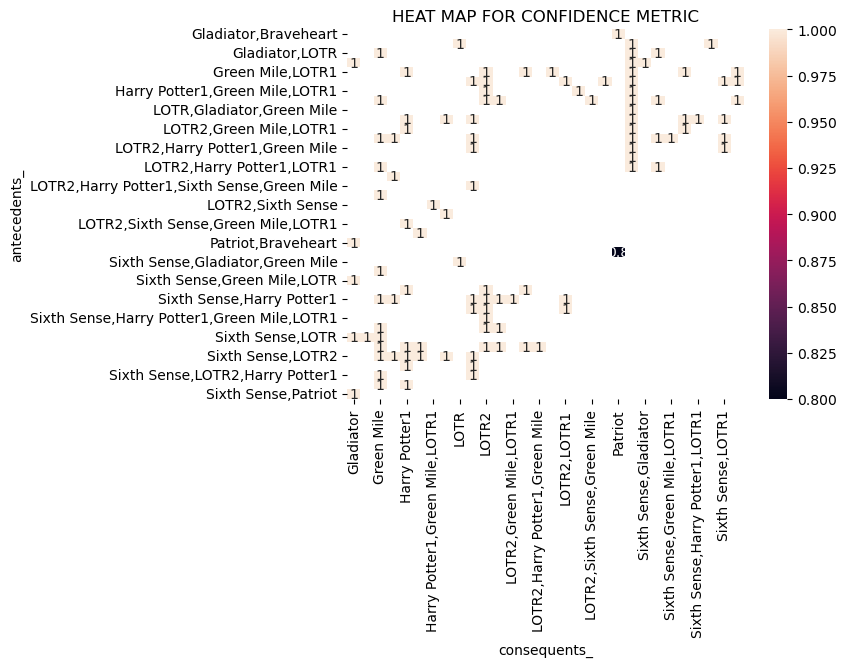

In [30]:
#generating heatmap with annotations
sns.heatmap(pivot,annot = True)
plt.title('HEAT MAP FOR CONFIDENCE METRIC')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [31]:
rules_fp_li = association_rules(frequent_itemsets_fp,metric = 'lift',min_threshold = 0.8)
print(rules_fp_li.shape)

(246, 9)


In [32]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x: len(x))
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
116,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
220,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,2
113,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
185,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
117,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Gladiator,Green Mile'),
  Text(4.5, 0, 'Green Mile'),
  Text(6.5, 0, 'Green Mile,LOTR1'),
  Text(8.5, 0, 'Harry Potter1,Green Mile'),
  Text(10.5, 0, 'Harry Potter1,LOTR1'),
  Text(12.5, 0, 'LOTR1'),
  Text(14.5, 0, 'LOTR2,Green Mile'),
  Text(16.5, 0, 'LOTR2,Harry Potter1'),
  Text(18.5, 0, 'LOTR2,Harry Potter1,LOTR1'),
  Text(20.5, 0, 'LOTR2,LOTR1'),
  Text(22.5, 0, 'LOTR2,Sixth Sense,Green Mile'),
  Text(24.5, 0, 'Patriot'),
  Text(26.5, 0, 'Sixth Sense,Gladiator'),
  Text(28.5, 0, 'Sixth Sense,Green Mile,LOTR1'),
  Text(30.5, 0, 'Sixth Sense,Harry Potter1,Green Mile'),
  Text(32.5, 0, 'Sixth Sense,LOTR'),
  Text(34.5, 0, 'Sixth Sense,LOTR2')])

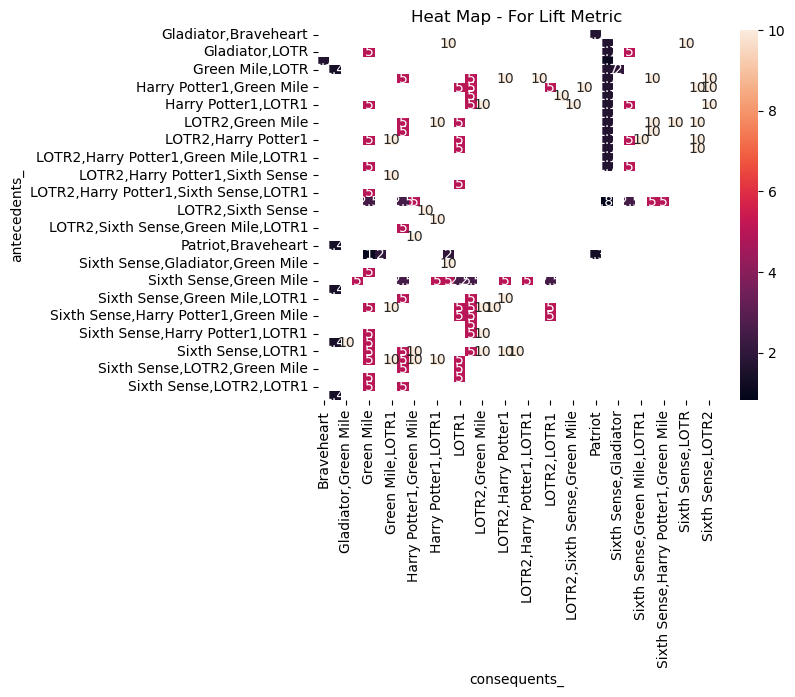

In [33]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)